<a href="https://colab.research.google.com/github/shivank9199/Prediction-of-resistance-mutation-in-SARS-CoV-2-against-Sotrovimab-using-machine-learning/blob/main/UG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=882bfb4c70dd526d4b2a774fb24913b5ad1df32a75a66

In [74]:
data = pd.read_csv("/content/scores-Sotrovimab.csv")

In [ ]:
data.shape

(1180, 5)

In [ ]:
data.describe()

,Affinity,dAffinity,Stability,dStability
count,1180.000000,1180.000000,1180.000000,1180.000000
mean,-76.662923,-0.018581,-505.495453,1.165594
std,2.385250,0.755222,155.032246,1.088873
min,-88.093138,-6.609195,-1111.184654,-1.611617
25%,-77.346596,-0.004321,-519.438045,0.354527
50%,-77.223691,0.000000,-511.678405,0.977551
75%,-74.275886,0.000362,-387.477624,1.728895
max,-71.660856,5.729056,-372.063717,9.120628


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mutation    1180 non-null   object 
 1   Affinity    1180 non-null   float64
 2   dAffinity   1180 non-null   float64
 3   Stability   1180 non-null   float64
 4   dStability  1180 non-null   float64
dtypes: float64(4), object(1)
memory usage: 46.2+ KB


In [ ]:
data.sample(5)

,mutation,Affinity,dAffinity,Stability,dStability
332,5:P384S,-77.223706,2.580195e-03,-520.308875,1.326633
59,4:E340E,-80.072045,0.000000e+00,-485.883805,0.000000
219,4:I358T,-81.943509,6.221655e-01,-885.339697,2.078883
1103,6:L517H,-74.275884,-1.430000e-07,-386.219837,1.406406
1062,6:V512I,-74.287266,-1.174370e-02,-386.810739,0.948644


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

mutation      0
Affinity      0
dAffinity     0
Stability     0
dStability    0
dtype: int64

In [75]:
def separator_1(mutation):
  return mutation[2]

def separator_2(mutation):
  return int(mutation[3:6])

def separator_3(mutation):
  return mutation[-1]

data['native_residue'] = data['mutation'].apply(separator_1)
data['position'] = data['mutation'].apply(separator_2)
data['mutated_residue'] = data['mutation'].apply(separator_3)

In [76]:
data = data.iloc[:,1:]
data.sample(5)

,Affinity,dAffinity,Stability,dStability,native_residue,position,mutated_residue
1121,-74.275885,-4.840000e-08,-388.660820,0.651866,L,518,V
37,-77.626704,5.738547e-01,-489.931374,0.636384,P,337,A
80,-79.922449,-2.575532e-01,-518.735675,0.971167,F,342,Y
506,-74.275891,-8.900000e-06,-385.475128,0.315615,V,407,L
976,-74.724815,-4.494060e-01,-389.901986,0.792700,P,499,T


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Affinity           0
dAffinity          0
Stability          0
dStability         0
native_residue     0
position           0
mutated_residue    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Affinity         1180 non-null   float64
 1   dAffinity        1180 non-null   float64
 2   Stability        1180 non-null   float64
 3   dStability       1180 non-null   float64
 4   native_residue   1180 non-null   object 
 5   position         1180 non-null   int64  
 6   mutated_residue  1180 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 64.7+ KB


In [ ]:
data['native_residue'].value_counts()

L    132
V    126
R    126
F     91
S     90
Y     84
I     80
N     80
A     64
P     56
D     48
T     45
G     45
E     35
C     35
K     16
W     12
H      8
Q      7
Name: native_residue, dtype: int64

<Axes: >

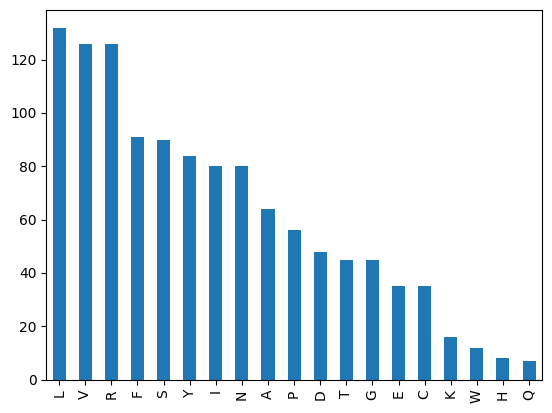

In [ ]:
data['native_residue'].value_counts().plot(kind='bar')

In [ ]:
data['mutated_residue'].value_counts()

S    106
L     77
F     74
I     73
V     71
D     61
A     60
T     59
H     58
R     57
Y     57
C     56
G     54
N     53
P     53
M     50
W     43
E     41
K     40
Q     37
Name: mutated_residue, dtype: int64

<Axes: >

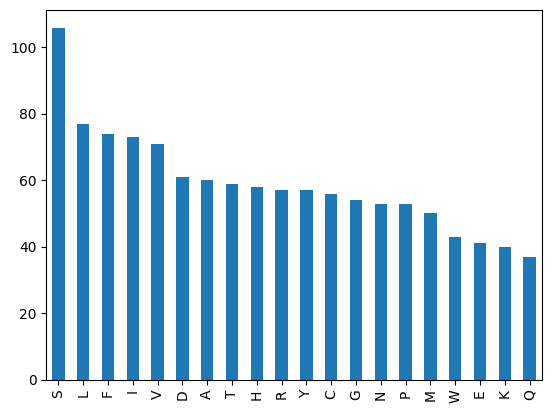

In [ ]:
data['mutated_residue'].value_counts().plot(kind='bar')

(array([  2.,   0.,  12.,  37.,  72.,  93., 467.,  39., 454.,   4.]),
 array([-88.09313762, -86.44990943, -84.80668125, -83.16345306,
        -81.52022488, -79.87699669, -78.2337685 , -76.59054032,
        -74.94731213, -73.30408395, -71.66085576]),
 <BarContainer object of 10 artists>)

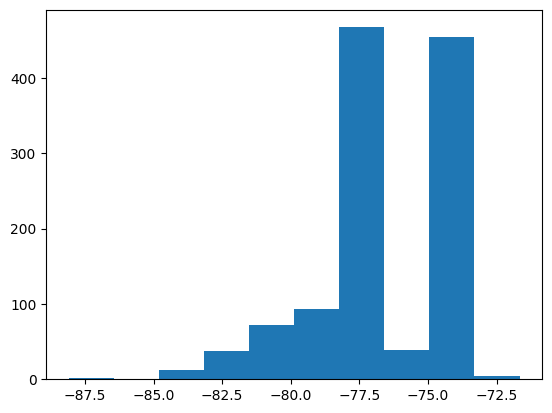

In [ ]:
plt.hist(data['Affinity'])

<ipython-input-20-49b80bb24e37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Affinity'])


<Axes: xlabel='Affinity', ylabel='Density'>

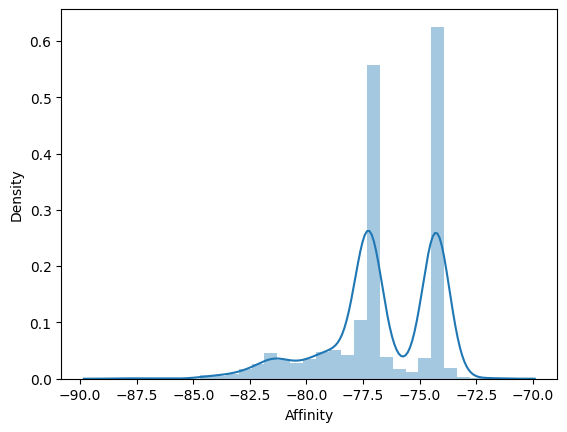

In [ ]:
sns.distplot(data['Affinity'])

<Axes: >

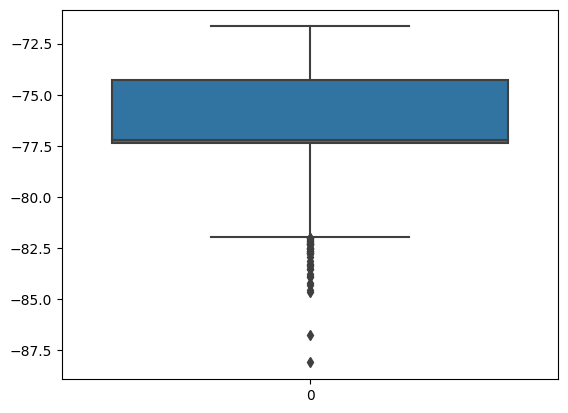

In [ ]:
sns.boxplot(data['Affinity'])

(array([   3.,    2.,    2.,   17.,   71., 1039.,   24.,   12.,    5.,
           5.]),
 array([-6.60919506, -5.37536992, -4.14154479, -2.90771965, -1.67389451,
        -0.44006938,  0.79375576,  2.0275809 ,  3.26140603,  4.49523117,
         5.7290563 ]),
 <BarContainer object of 10 artists>)

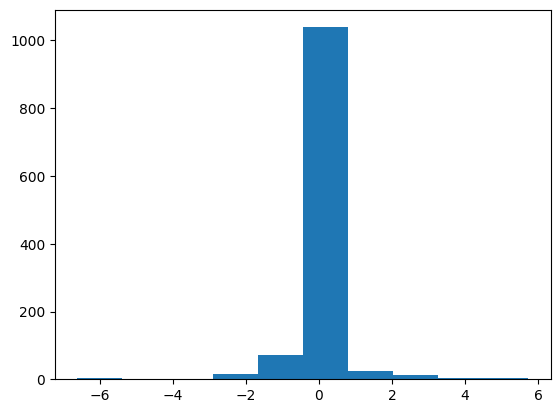

In [ ]:
plt.hist(data['dAffinity'])

<ipython-input-23-e4e1ad5da1fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dAffinity'])


<Axes: xlabel='dAffinity', ylabel='Density'>

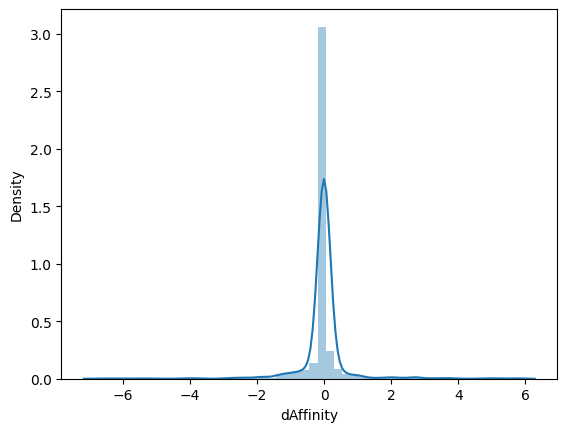

In [ ]:
sns.distplot(data['dAffinity'])

<Axes: >

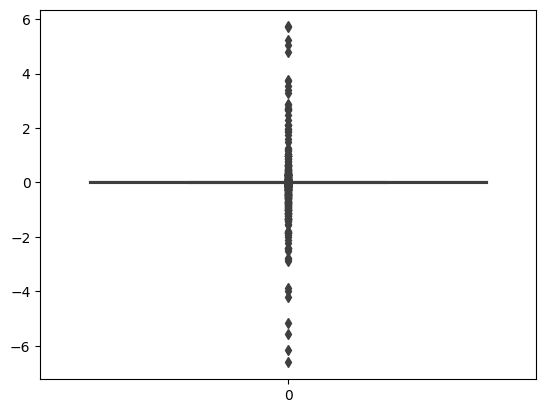

In [ ]:
sns.boxplot(data['dAffinity'])

(array([ 23.,  11.,   0.,  80.,   0.,   0.,   0., 170., 443., 453.]),
 array([-1111.184654  , -1037.27256035,  -963.3604667 ,  -889.44837305,
         -815.5362794 ,  -741.62418575,  -667.7120921 ,  -593.79999845,
         -519.8879048 ,  -445.97581115,  -372.0637175 ]),
 <BarContainer object of 10 artists>)

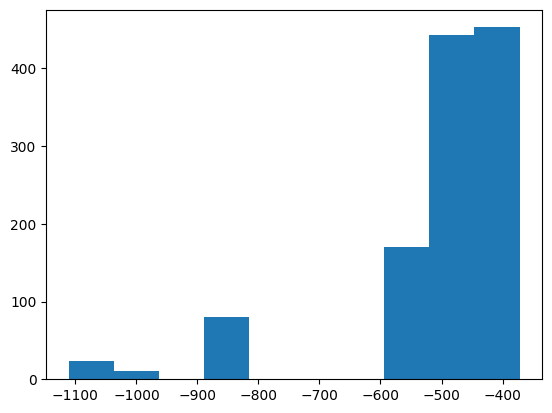

In [ ]:
plt.hist(data['Stability'])

<ipython-input-26-b20eb48c3906>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Stability'])


<Axes: xlabel='Stability', ylabel='Density'>

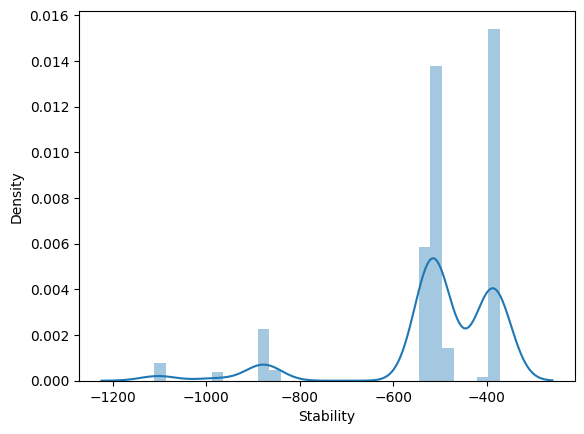

In [ ]:
sns.distplot(data['Stability'])

<Axes: >

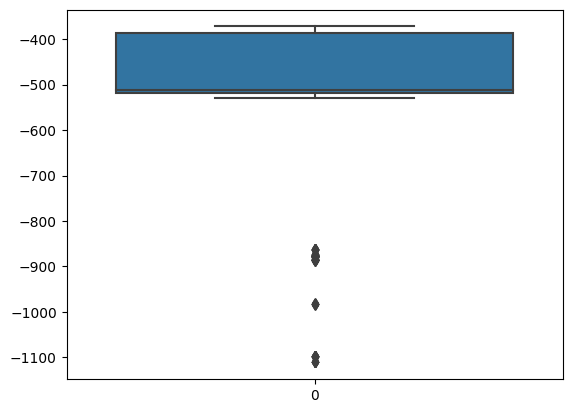

In [ ]:
sns.boxplot(data['Stability'])

(array([ 16., 346., 471., 243.,  70.,  27.,   6.,   0.,   0.,   1.]),
 array([-1.61161657, -0.5383921 ,  0.53483237,  1.60805685,  2.68128132,
         3.75450579,  4.82773026,  5.90095474,  6.97417921,  8.04740368,
         9.12062816]),
 <BarContainer object of 10 artists>)

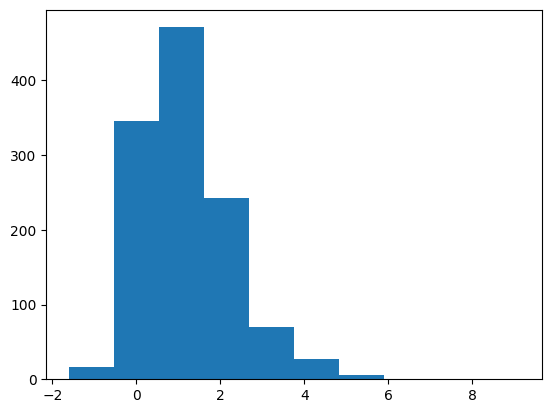

In [ ]:
plt.hist(data['dStability'])

<ipython-input-29-2bf35105a9c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dStability'])


<Axes: xlabel='dStability', ylabel='Density'>

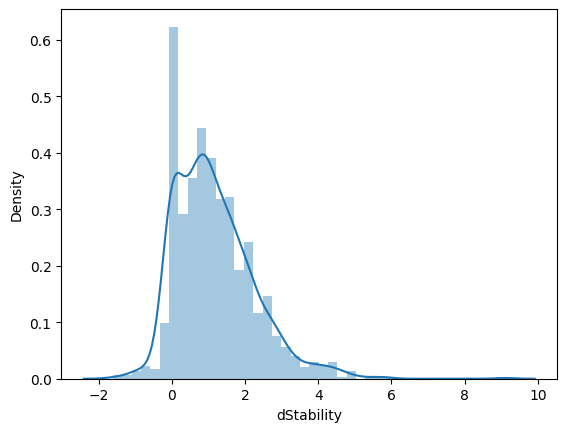

In [ ]:
sns.distplot(data['dStability'])

<Axes: >

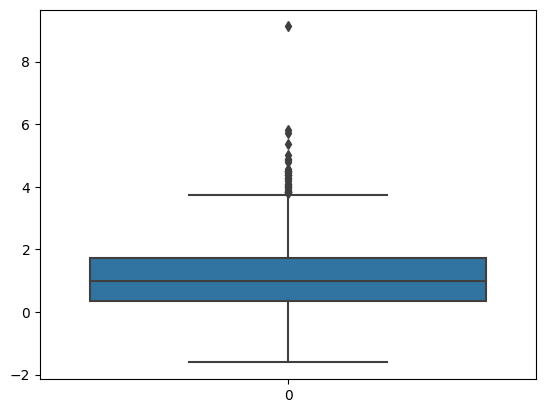

In [ ]:
sns.boxplot(data['dStability'])

(array([153., 142.,  69., 145.,  46., 161., 108.,  52., 134., 170.]),
 array([332. , 351.4, 370.8, 390.2, 409.6, 429. , 448.4, 467.8, 487.2,
        506.6, 526. ]),
 <BarContainer object of 10 artists>)

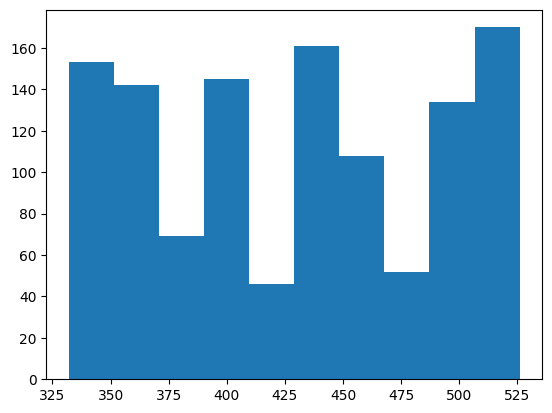

In [ ]:
plt.hist(data['position'])

<ipython-input-32-5aae2c23796f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['position'])


<Axes: xlabel='position', ylabel='Density'>

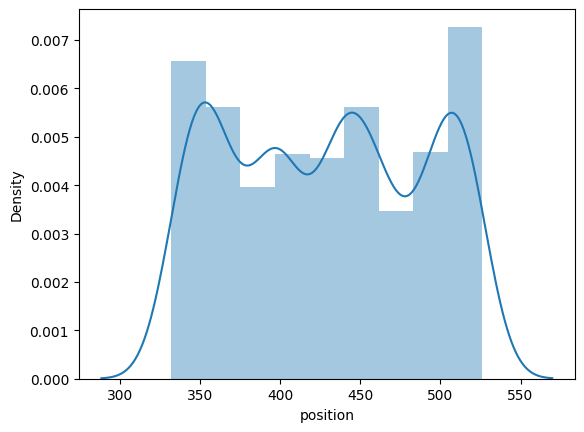

In [ ]:
sns.distplot(data['position'])

<Axes: >

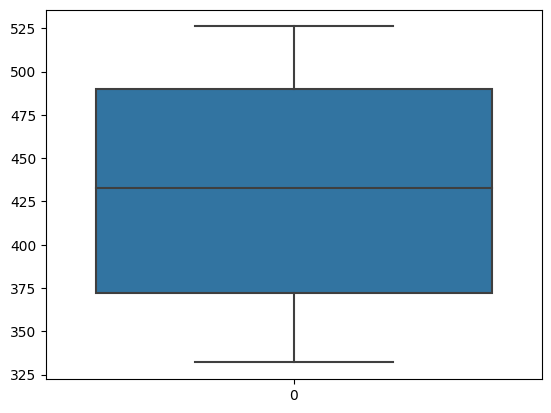

In [ ]:
sns.boxplot(data['position'])

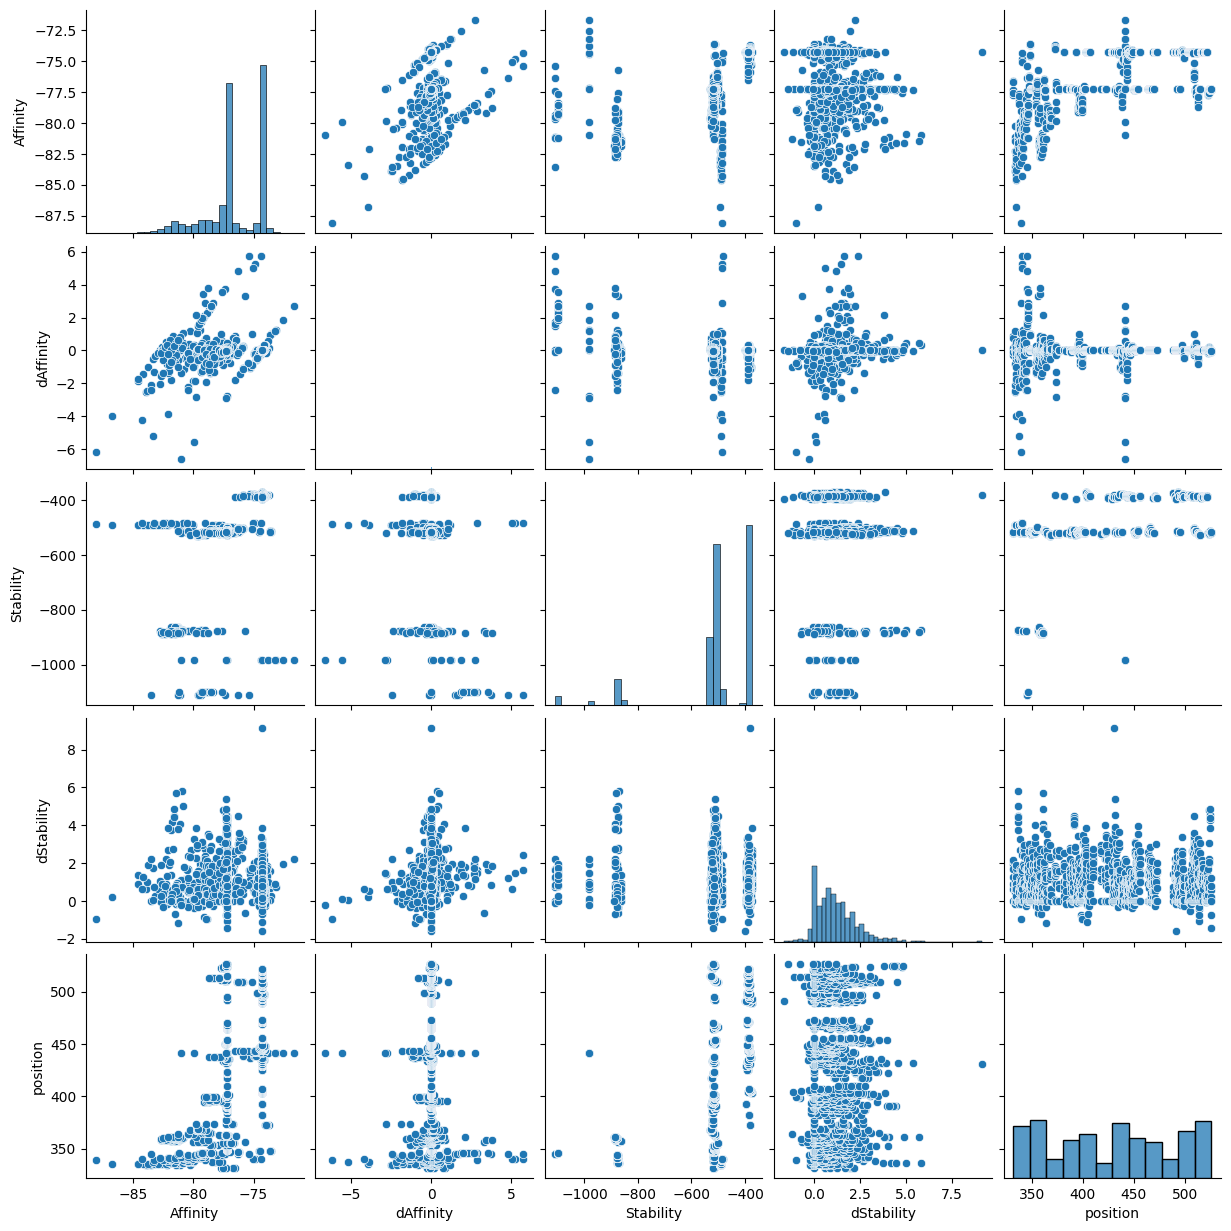

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr()

<ipython-input-35-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Affinity,dAffinity,Stability,dStability,position
Affinity,1.000000,0.244196,0.649205,-0.060126,0.570230
dAffinity,0.244196,1.000000,-0.171955,0.124326,-0.015013
Stability,0.649205,-0.171955,1.000000,-0.073603,0.469953
dStability,-0.060126,0.124326,-0.073603,1.000000,-0.014828
position,0.570230,-0.015013,0.469953,-0.014828,1.000000


<ipython-input-36-2a035af653c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm')


<Axes: >

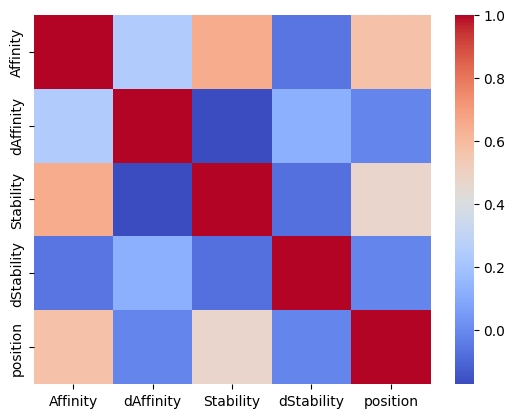

In [ ]:
sns.heatmap(data.corr(), cmap='coolwarm')

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Affinity', axis=1), data['Affinity'], test_size=0.2, random_state=2)

In [ ]:
X_train

,dAffinity,Stability,dStability,native_residue,position,mutated_residue
854,-2.850000e-08,-387.346783,0.039290,E,471,D
593,-1.248522e-03,-390.380059,0.839424,V,433,L
197,0.000000e+00,-863.326779,0.000000,R,357,R
519,0.000000e+00,-525.815756,0.000000,I,418,I
375,4.704690e-04,-523.901502,2.864162,F,392,S
...,...,...,...,...,...,...
1099,-3.106592e-03,-391.145201,0.175146,E,516,V
466,-5.510000e-06,-372.194875,3.847498,R,403,G
299,4.636258e-03,-381.274623,1.845469,P,373,H
493,0.000000e+00,-381.812842,0.000000,E,406,E


In [106]:
transformer = ColumnTransformer(transformers = [('tns', OneHotEncoder(sparse=False), ['native_residue', 'mutated_residue'])], remainder='passthrough')

In [ ]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
lr_all.score(X_test, y_test)

0.6424940148827065

In [ ]:
svr_all = SVR(kernel = "rbf")
svr_all.fit(X_train, y_train)
svr_all.score(X_test, y_test)

0.6818233649591644

In [ ]:
dtr_all = DecisionTreeRegressor()
dtr_all.fit(X_train, y_train)
dtr_all.score(X_test, y_test)

0.9386676167040385

In [ ]:
rfr_all = RandomForestRegressor(random_state = 0)
rfr_all.fit(X_train, y_train)
rfr_all.score(X_test, y_test)

0.9590372816867555

In [ ]:
pred_rfr_all = rfr_all.predict(X_test)

The parameters of the line: [1.02251871 1.69568444]


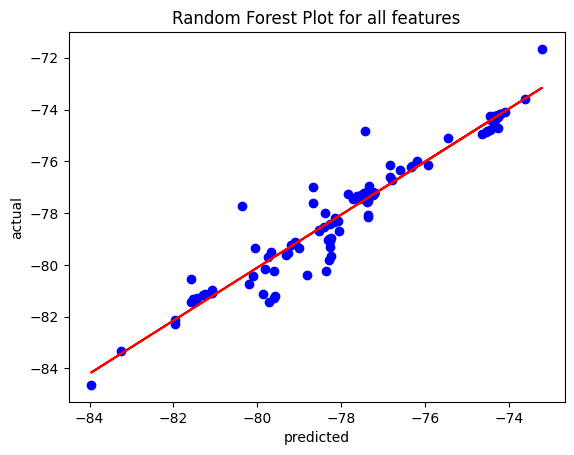

In [ ]:
theta = np.polyfit(pred_rfr_all, y_test, 1)
print(f'The parameters of the line: {theta}')
y_line_all = theta[1] + theta[0] * pred_rfr_all
plt.scatter(pred_rfr_all, y_test, color = 'blue')
plt.plot(pred_rfr_all, y_line_all, 'r')
plt.title('Random Forest Plot for all features')
plt.xlabel('predicted')
plt.ylabel('actual')

plt.show()

**Position**

In [105]:
X_train_position, X_test_position, y_train_position, y_test_position = train_test_split(data.drop(columns=['Affinity', 'dAffinity', 'Stability', 'dStability']), data['Affinity'], test_size=0.2, random_state=2)

In [107]:
X_train_position = transformer.fit_transform(X_train_position)
X_test_position = transformer.transform(X_test_position)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [87]:
lr_position = LinearRegression()
lr_position.fit(X_train_position, y_train_position)
lr_position.score(X_test_position, y_test_position)

0.30348084285187804

In [88]:
svr_position = SVR(kernel = "rbf")
svr_position.fit(X_train_position, y_train_position)
svr_position.score(X_test_position, y_test_position)

0.3376496080619331

In [89]:
dtr_position = DecisionTreeRegressor()
dtr_position.fit(X_train_position, y_train_position)
dtr_position.score(X_test_position, y_test_position)

0.9171803050060781

In [90]:
rfr_position = RandomForestRegressor(random_state = 0)
rfr_position.fit(X_train_position, y_train_position)
rfr_position.score(X_test_position, y_test_position)

0.9382898305465728

In [92]:
pred_rfr_position = rfr_position.predict(X_test_position)

The parameters of the line: [ 0.99541875 -0.29308537]


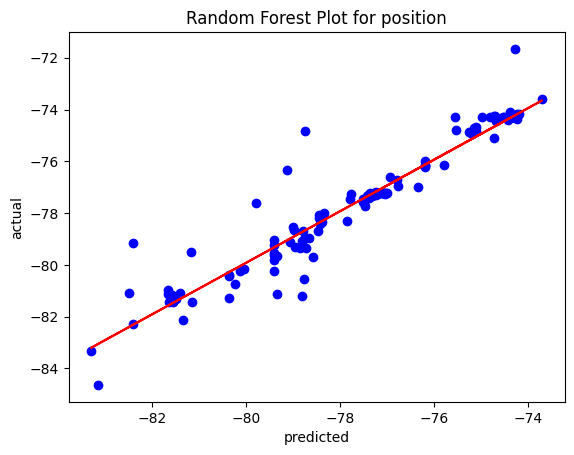

In [93]:
theta_1 = np.polyfit(pred_rfr_position, y_test_position, 1)
print(f'The parameters of the line: {theta_1}')
y_line_position = theta_1[1] + theta_1[0] * pred_rfr_position
plt.scatter(pred_rfr_position, y_test_position, color = 'blue')
plt.plot(pred_rfr_position, y_line_position, 'r')
plt.title('Random Forest Plot for position')
plt.xlabel('predicted')
plt.ylabel('actual')

plt.show()

In [108]:
data_check_337 = [[337, 'P', 'A'], [337, 'P', 'C'], [337, 'P', 'D'], [337, 'P', 'E'], [337, 'P', 'F'], [337, 'P', 'G'], [337, 'P', 'H'], [337, 'P', 'I'], [337, 'P', 'K'], [337, 'P', 'L'], [337, 'P', 'M'], [337, 'P', 'N'], [337, 'P', 'P'], [337, 'P', 'Q'], [337, 'P', 'R'], [337, 'P', 'S'], [337, 'P', 'T'], [337, 'P', 'V'], [337, 'P', 'W'], [337, 'P', 'Y']]
df = pd.DataFrame(data_check_337, columns=['position', 'native_residue', 'mutated_residue'])
data_check_337_encoded = transformer.transform(df)
check_337 = data_check_337_encoded[0]
data_check_337_encoded

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 337.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 337.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 337.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,  

In [109]:
pred_337 = rfr_position.predict(data_check_337_encoded)
pred_337

array([-79.77294484, -79.79215866, -79.7566057 , -79.82405077,
       -79.79267898, -79.1537403 , -79.44992702, -79.93717947,
       -80.620934  , -78.60600711, -79.96219733, -80.11787293,
       -78.93994372, -82.17035549, -80.01933931, -81.17022886,
       -80.27578707, -79.3865664 , -79.84213814, -81.05949894])

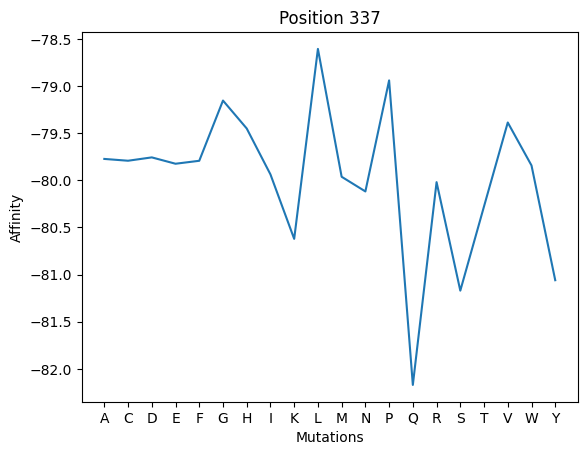

In [111]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 337")
plt.plot(X_label, pred_337)

In [112]:
data_check_340 = [[340, 'E', 'A'], [340, 'E', 'C'], [340, 'E', 'D'], [340, 'E', 'E'], [340, 'E', 'F'], [340, 'E', 'G'], [340, 'E', 'H'], [340, 'E', 'I'], [340, 'E', 'K'], [340, 'E', 'L'], [340, 'E', 'M'], [340, 'E', 'N'], [340, 'E', 'P'], [340, 'E', 'Q'], [340, 'E', 'R'], [340, 'E', 'S'], [340, 'E', 'T'], [340, 'E', 'V'], [340, 'E', 'W'], [340, 'E', 'Y']]
df = pd.DataFrame(data_check_340, columns=['position', 'native_residue', 'mutated_residue'])
data_check_340_encoded = transformer.transform(df)
check_340 = data_check_340_encoded[0]

In [113]:
pred_340 = rfr_position.predict(data_check_340_encoded)
pred_340

array([-78.74242345, -78.78791677, -78.75104854, -79.44089415,
       -78.58328325, -75.64524622, -79.01557686, -78.94292836,
       -80.58161363, -78.62494538, -79.26003176, -79.00921363,
       -78.547082  , -81.48836484, -78.84803871, -78.87815079,
       -78.775256  , -77.01862319, -78.87236967, -79.79868267])

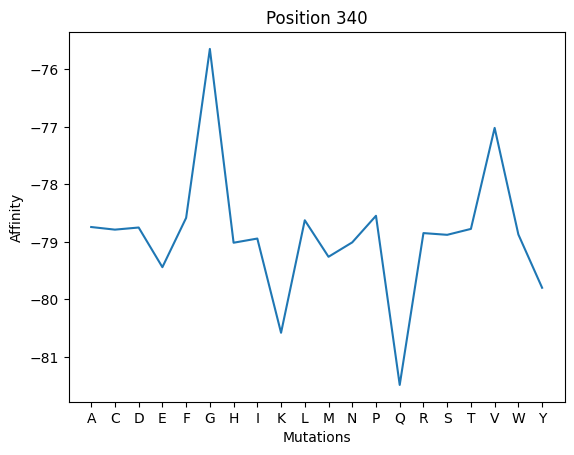

In [114]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 340")
plt.plot(X_label, pred_340)

In [115]:
data_check_508 = [[508, 'Y', 'A'], [508, 'Y', 'C'], [508, 'Y', 'D'], [508, 'Y', 'E'], [508, 'Y', 'F'], [508, 'Y', 'G'], [508, 'Y', 'H'], [508, 'Y', 'I'], [508, 'Y', 'K'], [508, 'Y', 'L'], [508, 'Y', 'M'], [508, 'Y', 'N'], [508, 'Y', 'P'], [508, 'Y', 'Q'], [508, 'Y', 'R'], [508, 'Y', 'S'], [508, 'Y', 'T'], [508, 'Y', 'V'], [508, 'Y', 'W'], [508, 'Y', 'Y']]
df = pd.DataFrame(data_check_508, columns=['position', 'native_residue', 'mutated_residue'])
data_check_508_encoded = transformer.transform(df)
check_508 = data_check_508_encoded[0]

In [116]:
pred_508 = rfr_position.predict(data_check_508_encoded)
pred_508

array([-74.30761969, -74.3013135 , -74.34559989, -74.30799165,
       -74.30921254, -74.30799165, -74.39498588, -74.30799165,
       -74.30799165, -74.30666393, -74.30799165, -74.30901239,
       -74.30799165, -74.30689392, -74.30799165, -74.34471243,
       -74.31035896, -74.29671456, -74.33715598, -74.30751245])

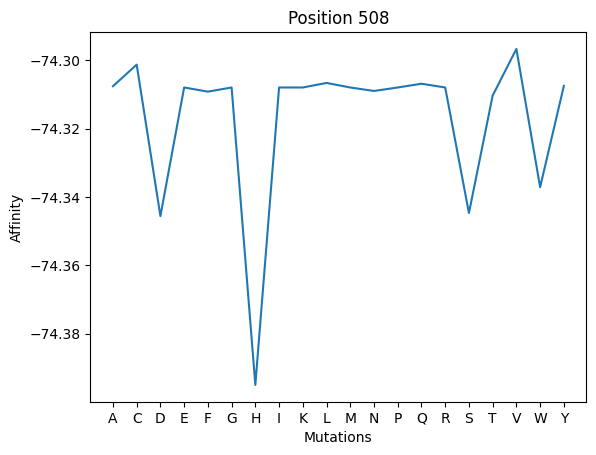

In [117]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 508")
plt.plot(X_label, pred_508)

In [119]:
data_check_262 = [[262, 'A', 'A'], [262, 'A', 'C'], [262, 'A', 'D'], [262, 'A', 'E'], [262, 'A', 'F'], [262, 'A', 'G'], [262, 'A', 'H'], [262, 'A', 'I'], [262, 'A', 'K'], [262, 'A', 'L'], [262, 'A', 'M'], [262, 'A', 'N'], [262, 'A', 'P'], [262, 'A', 'Q'], [262, 'A', 'R'], [262, 'A', 'S'], [262, 'A', 'T'], [262, 'A', 'V'], [262, 'A', 'W'], [262, 'A', 'Y']]
df = pd.DataFrame(data_check_262, columns=['position', 'native_residue', 'mutated_residue'])
data_check_262_encoded = transformer.transform(df)
check_262 = data_check_262_encoded[0]

In [120]:
pred_262 = rfr_position.predict(data_check_262_encoded)
pred_262

array([-79.5150103 , -79.58057522, -79.08945333, -79.86286734,
       -79.47858693, -79.02654484, -79.78140913, -79.59841324,
       -79.7198981 , -79.31689464, -79.6408154 , -79.44443388,
       -79.7679767 , -80.00469986, -79.69201982, -79.68893541,
       -79.40098397, -79.38051601, -79.77630336, -80.17549581])

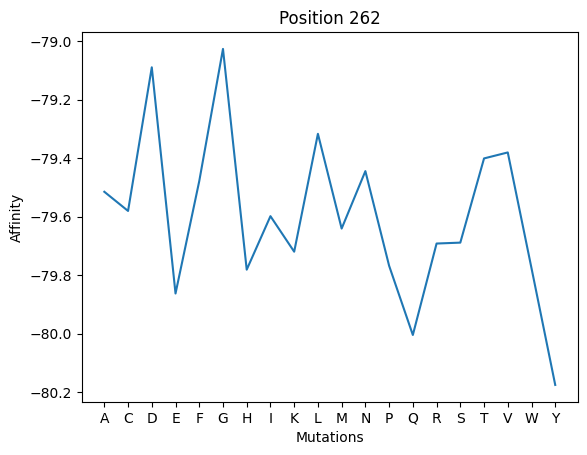

In [121]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 262")
plt.plot(X_label, pred_262)

In [122]:
data_check_796 = [[796, 'D', 'A'], [796, 'D', 'C'], [796, 'D', 'D'], [796, 'D', 'E'], [796, 'D', 'F'], [796, 'D', 'G'], [796, 'D', 'H'], [796, 'D', 'I'], [796, 'D', 'K'], [796, 'D', 'L'], [796, 'D', 'M'], [796, 'D', 'N'], [796, 'D', 'P'], [796, 'D', 'Q'], [796, 'D', 'R'], [796, 'D', 'S'], [796, 'D', 'T'], [796, 'D', 'V'], [796, 'D', 'W'], [796, 'D', 'Y']]
df = pd.DataFrame(data_check_796, columns=['position', 'native_residue', 'mutated_residue'])
data_check_796_encoded = transformer.transform(df)
check_796 = data_check_796_encoded[0]

In [123]:
pred_796 = rfr_position.predict(data_check_796_encoded)
pred_796

array([-77.24505555, -77.24705438, -77.26369624, -77.28466484,
       -77.28258105, -77.24809355, -77.24863987, -77.26120886,
       -77.24863987, -77.24863987, -77.26474069, -77.25071834,
       -77.24863987, -77.24863987, -77.2384584 , -77.2485663 ,
       -77.24863987, -77.24863987, -77.24848698, -77.24965708])

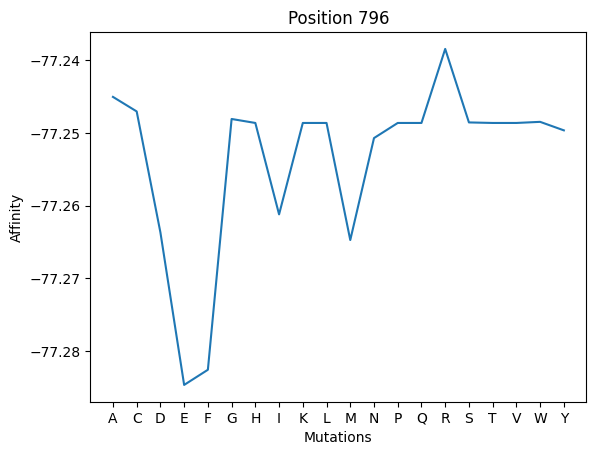

In [124]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 796")
plt.plot(X_label, pred_796)

In [125]:
data_check_372 = [[372, 'A', 'A'], [372, 'A', 'C'], [372, 'A', 'D'], [372, 'A', 'E'], [372, 'A', 'F'], [372, 'A', 'G'], [372, 'A', 'H'], [372, 'A', 'I'], [372, 'A', 'K'], [372, 'A', 'L'], [372, 'A', 'M'], [372, 'A', 'N'], [372, 'A', 'P'], [372, 'A', 'Q'], [372, 'A', 'R'], [372, 'A', 'S'], [372, 'A', 'T'], [372, 'A', 'V'], [372, 'A', 'W'], [372, 'A', 'Y']]
df = pd.DataFrame(data_check_372, columns=['position', 'native_residue', 'mutated_residue'])
data_check_372_encoded = transformer.transform(df)
check_372 = data_check_372_encoded[0]

In [126]:
pred_372 = rfr_position.predict(data_check_372_encoded)
pred_372

array([-73.90862224, -73.90844501, -73.90844501, -73.90844501,
       -73.90844501, -73.90844502, -73.89677176, -73.90844501,
       -73.90844501, -74.00651955, -73.90844501, -73.90844501,
       -73.89368949, -73.92394015, -73.80667361, -73.92286314,
       -73.96885151, -73.90844501, -73.90844501, -73.90844501])

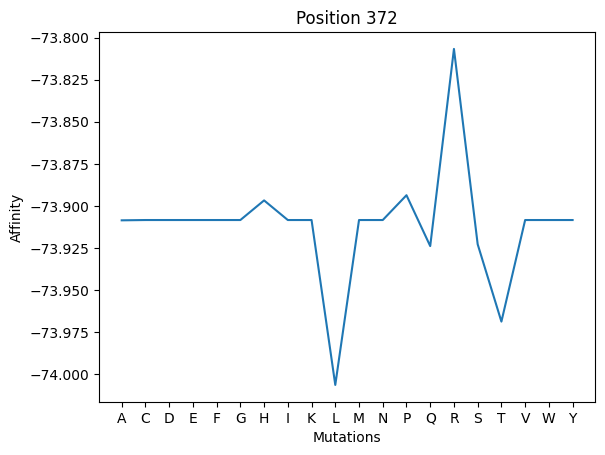

In [127]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 372")
plt.plot(X_label, pred_372)

In [128]:
data_check_938 = [[938, 'H', 'A'], [938, 'H', 'C'], [938, 'H', 'D'], [938, 'H', 'E'], [938, 'H', 'F'], [938, 'H', 'G'], [938, 'H', 'H'], [938, 'H', 'I'], [938, 'H', 'K'], [938, 'H', 'L'], [938, 'H', 'M'], [938, 'H', 'N'], [938, 'H', 'P'], [938, 'H', 'Q'], [938, 'H', 'R'], [938, 'H', 'S'], [938, 'H', 'T'], [938, 'H', 'V'], [938, 'H', 'W'], [938, 'H', 'Y']]
df = pd.DataFrame(data_check_938, columns=['position', 'native_residue', 'mutated_residue'])
data_check_938_encoded = transformer.transform(df)
check_938 = data_check_938_encoded[0]

In [129]:
pred_938 = rfr_position.predict(data_check_938_encoded)
pred_938

array([-77.24505555, -77.24705438, -77.26369624, -77.28466484,
       -77.28258105, -77.24809355, -77.24863987, -77.26120886,
       -77.24863987, -77.24863987, -77.26474069, -77.25071834,
       -77.24863987, -77.24863987, -77.2384584 , -77.2485663 ,
       -77.24863987, -77.24863987, -77.24848698, -77.24965708])

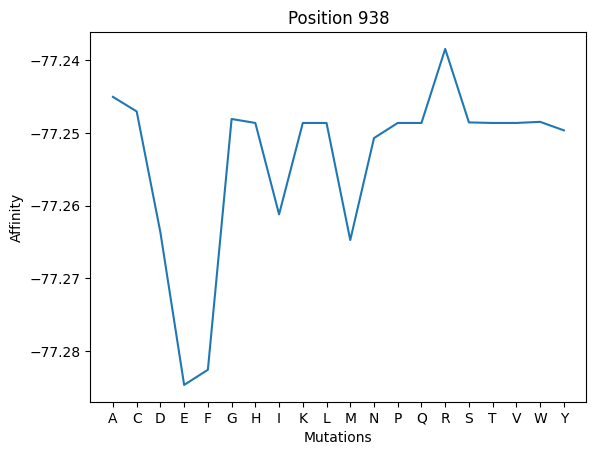

In [130]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 938")
plt.plot(X_label, pred_938)

In [131]:
data_check_839 = [[839, 'D', 'A'], [839, 'D', 'C'], [839, 'D', 'D'], [839, 'D', 'E'], [839, 'D', 'F'], [839, 'D', 'G'], [839, 'D', 'H'], [839, 'D', 'I'], [839, 'D', 'K'], [839, 'D', 'L'], [839, 'D', 'M'], [839, 'D', 'N'], [839, 'D', 'P'], [839, 'D', 'Q'], [839, 'D', 'R'], [839, 'D', 'S'], [839, 'D', 'T'], [839, 'D', 'V'], [839, 'D', 'W'], [839, 'D', 'Y']]
df = pd.DataFrame(data_check_839, columns=['position', 'native_residue', 'mutated_residue'])
data_check_839_encoded = transformer.transform(df)
check_839 = data_check_839_encoded[0]

In [132]:
pred_839 = rfr_position.predict(data_check_839_encoded)
pred_839

array([-77.24505555, -77.24705438, -77.26369624, -77.28466484,
       -77.28258105, -77.24809355, -77.24863987, -77.26120886,
       -77.24863987, -77.24863987, -77.26474069, -77.25071834,
       -77.24863987, -77.24863987, -77.2384584 , -77.2485663 ,
       -77.24863987, -77.24863987, -77.24848698, -77.24965708])

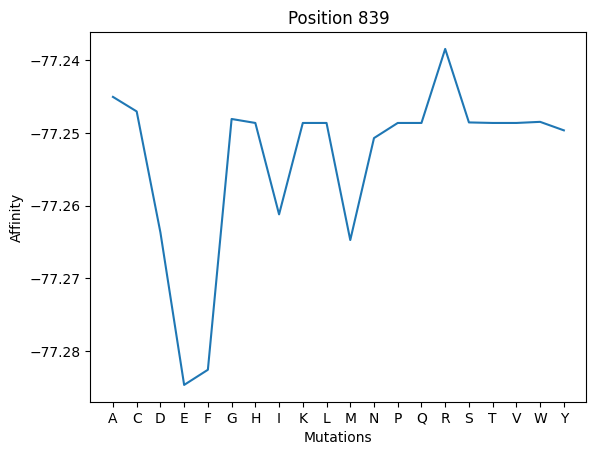

In [133]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 839")
plt.plot(X_label, pred_839)

**Stability**

In [ ]:
X_train_stability = X_train[:,[38]]
X_test_stability = X_test[:,[38]]

In [ ]:
lr_stabilty = LinearRegression()
lr_stabilty.fit(X_train_stability, y_train)
lr_stabilty.score(X_test_stability, y_test)

0.4590282771365354

In [ ]:
svr_stability = SVR(kernel = "rbf")
svr_stability.fit(X_train_stability, y_train)
svr_stability.score(X_test_stability, y_test)

0.7040395148972682

In [ ]:
dtr_stability = DecisionTreeRegressor()
dtr_stability.fit(X_train_stability, y_train)
dtr_stability.score(X_test_stability, y_test)

0.707280147872533

In [ ]:
rfr_stability = RandomForestRegressor(random_state = 0)
rfr_stability.fit(X_train_stability, y_train)
rfr_stability.score(X_test_stability, y_test)

0.7632857631096788

In [ ]:
pred_stability = rfr_stability.predict(X_test_stability)

The parameters of the line: [ 0.92966272 -5.43239089]


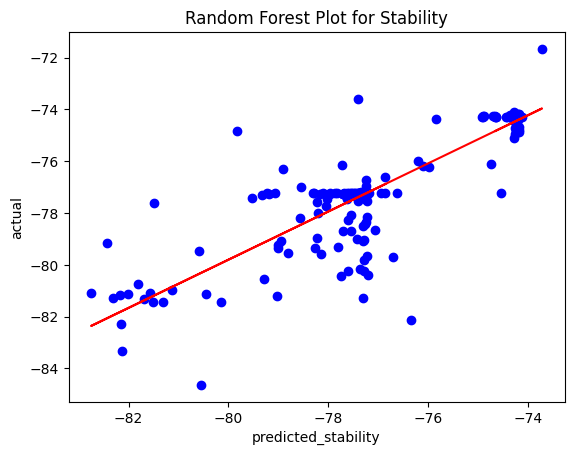

In [ ]:
theta_2 = np.polyfit(pred_stability, y_test, 1)
print(f'The parameters of the line: {theta_2}')
y_line_stability = theta_2[1] + theta_2[0] * pred_stability
plt.scatter(pred_stability, y_test, color="blue")
plt.plot(pred_stability, y_line_stability, 'r')
plt.title('Random Forest Plot for Stability')
plt.xlabel('predicted_stability')
plt.ylabel('actual')

plt.show()

**dStability**

In [ ]:
X_train_dStability = X_train[:,[39]]
X_test_dStability = X_test[:,[39]]

In [ ]:
lr_dStabilty = LinearRegression()
lr_dStabilty.fit(X_train_dStability, y_train)
lr_dStabilty.score(X_test_dStability, y_test)

0.008290601896927208

In [ ]:
svr_dStability = SVR(kernel = "rbf")
svr_dStability.fit(X_train_dStability, y_train)
svr_dStability.score(X_test_dStability, y_test)

-0.04124695941141532

In [ ]:
dtr_dStability = DecisionTreeRegressor()
dtr_dStability.fit(X_train_dStability, y_train)
dtr_dStability.score(X_test_dStability, y_test)

-0.9504566917648127

In [ ]:
rfr_dStability = RandomForestRegressor(random_state = 0)
rfr_dStability.fit(X_train_dStability, y_train)
rfr_dStability.score(X_test_dStability, y_test)

-0.44981263872771615

In [ ]:
pred_dStability = rfr_dStability.predict(X_test_dStability)

Text(0.5, 1.0, 'Random Forest Plot for dStability')

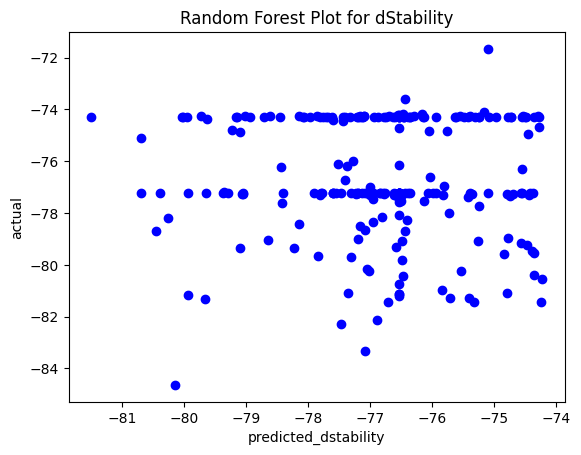

In [ ]:
plt.scatter(pred_dStability, y_test, color = 'blue')
plt.xlabel('predicted_dstability')
plt.ylabel('actual')
plt.title('Random Forest Plot for dStability')

**dAffinity**

In [ ]:
X_train_dAffinity = X_train[:,[37]]
X_test_dAffinity = X_test[:,[37]]

In [ ]:
lr_dAffinity = LinearRegression()
lr_dAffinity.fit(X_train_dAffinity, y_train)
lr_dAffinity.score(X_test_dAffinity, y_test)

-0.0139471022943094

In [ ]:
svr_dAffinity = SVR(kernel = "rbf")
svr_dAffinity.fit(X_train_dAffinity, y_train)
svr_dAffinity.score(X_test_dAffinity, y_test)

0.04365244325075601

In [ ]:
dtr_dAffinity = DecisionTreeRegressor()
dtr_dAffinity.fit(X_train_dAffinity, y_train)
dtr_dAffinity.score(X_test_dAffinity, y_test)

-0.03978570978951024

In [ ]:
rfr_dAffinity = RandomForestRegressor(random_state = 0)
rfr_dAffinity.fit(X_train_dAffinity, y_train)
rfr_dAffinity.score(X_test_dAffinity, y_test)

0.14463077182911388

In [ ]:
pred_dAffinity = rfr_dAffinity.predict(X_test_dAffinity)

Text(0.5, 1.0, 'Random Forest Plot for dAffinity')

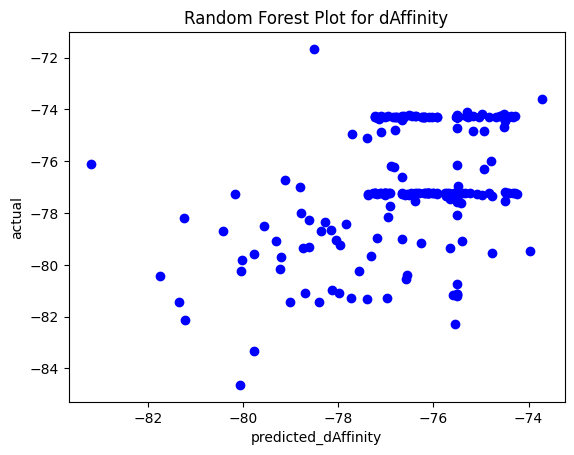

In [ ]:
plt.scatter(pred_dAffinity, y_test, color = 'blue')
plt.xlabel('predicted_dAffinity')
plt.ylabel('actual')
plt.title('Random Forest Plot for dAffinity')